# Cleanup, Validation, and Resampling

This repository contains code for cleaning up and validating the ANES dataset for use in this project.

In [2]:
import pandas as pd
import numpy as np

# Load the datset.
For this analysis, I will be using the ANES (American National Elections Study) dataset. 

This dataset includes information from pre and post election surveys for voters from 1948 to 2016 - voters were interviewed both leading up to and following the election year the survey corresponds to. Each row in the dataframe corresponds to a dataset 

To get the data, make an account here and download the cumulative data file (I used the stata file, or .dta. Because the dataset is quite large and blocked by terms of use that one must accept to access the data, I've chosen not to upload it to GitHub or drive and instead reference it locally.

I've included the path on my own machine below in the variable data_path, but be sure to substitute it for where you are storing it. 

In [3]:
data_path = "C:/Users/anush/OneDrive/Documents/anes_data/anes_timeseries_cdf_dta/anes_timeseries_cdf.dta"
df = pd.read_stata(data_path)

In [4]:
df

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2019-Sep-10,1948.0,1001.0,19481001.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANES_CDF_VERSION:2019-Sep-10,1948.0,1002.0,19481002.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANES_CDF_VERSION:2019-Sep-10,1948.0,1003.0,19481003.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANES_CDF_VERSION:2019-Sep-10,1948.0,1004.0,19481004.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANES_CDF_VERSION:2019-Sep-10,1948.0,1005.0,19481005.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ANES_CDF_VERSION:2019-Sep-10,1948.0,1006.0,19481006.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ANES_CDF_VERSION:2019-Sep-10,1948.0,1007.0,19481007.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ANES_CDF_VERSION:2019-Sep-10,1948.0,1008.0,19481008.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ANES_CDF_VERSION:2019-Sep-10,1948.0,1009.0,19481009.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ANES_CDF_VERSION:2019-Sep-10,1948.0,1010.0,19481010.0,1.0,1.0,1.0,1.000,1.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2019-Sep-10,1948.0,1001.0,19481001.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANES_CDF_VERSION:2019-Sep-10,1948.0,1002.0,19481002.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANES_CDF_VERSION:2019-Sep-10,1948.0,1003.0,19481003.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANES_CDF_VERSION:2019-Sep-10,1948.0,1004.0,19481004.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANES_CDF_VERSION:2019-Sep-10,1948.0,1005.0,19481005.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
59939,ANES_CDF_VERSION:2019-Sep-10,2016.0,5086.0,20165086.0,0.0,0.0,0.0,0.818,0.818,0.818,...,2,1. Hard-working,NaN,3. Too little influence,1. Someone else,2. No,1. Heterosexual or straight,1. Yes,1. Yes,1. Yes
59940,ANES_CDF_VERSION:2019-Sep-10,2016.0,5087.0,20165087.0,0.0,0.0,0.0,1.280,1.280,1.280,...,3,6,NaN,2. Just about the right amount,NaN,NaN,1. Heterosexual or straight,2. No,1. Yes,1. Yes
59941,ANES_CDF_VERSION:2019-Sep-10,2016.0,5088.0,20165088.0,0.0,0.0,0.0,3.788,3.788,3.788,...,1. Hard-working,5,NaN,2. Just about the right amount,NaN,NaN,1. Heterosexual or straight,2. No,1. Yes,1. Yes
59942,ANES_CDF_VERSION:2019-Sep-10,2016.0,5089.0,20165089.0,0.0,0.0,0.0,1.162,1.162,1.162,...,2,2,NaN,3. Too little influence,2. Other and self (both),2. No,1. Heterosexual or straight,2. No,1. Yes,1. Yes
59943,ANES_CDF_VERSION:2019-Sep-10,2016.0,5090.0,20165090.0,0.0,0.0,0.0,1.424,1.424,1.424,...,NaN,NaN,NaN,NaN,1. Someone else,2. No,1. Heterosexual or straight,2. No,1. Yes,1. Yes


In [7]:
df.shape

(59944, 1029)

# Clean Up the Dataset

These numerical error codes refer to missing data.

All of the variables are categorical but they tend to have numerical error codes as such: 

‐1 = Inapplicable

‐2 = Text responses available in separate file or coded version will be included in future release

‐3 = Restricted

‐4 = Error

‐5 = Breakoff, sufficient partial IW

‐6 = No post‐election interview

‐7 = No post data, deleted due to incomplete IW

‐8 = Don’t know

‐9 = Refused

I spent quite a bit of time trying to explore this dataset and decode the cells with missing data and the associated error codes - this quickly became overly complicated, and involved a large set of individual changes that did not apply to the variables under study later in the project.

Eventually, I ended up just writing this function to apply on each column that I convert to numeric values that checks for negative variables and makes them into NaN. Referencing [Austin Veseliza's approach](https://github.com/AustinVes/Voter_Emotions/blob/master/main.ipynb) was very helpful here. I wrote functions for both the series and the dataset because the data is stored in categoricals by default, so for smaller commands I could just look at individual series. 


In [8]:
from pandas.api.types import is_numeric_dtype

def sanitize_series(series):
    """
    Turns missing data codes in Pandas series into NaN, and then returns 
    the pandas series.
    """
    return series.map(lambda n: n if (n > 0) else np.nan)

def sanitize_df(df):
    """
    Turns missing data codes in Pandas series into NaN, and then returns 
    the pandas series.
    """
    return df.applymap(lambda n: np.nan if (is_numeric_dtype(type(n)) and n < 0) else n)


For now, however, I will just run it on the entire dataset, which will take a minute but will facilitate validation.

In [9]:
df = sanitize_df(df)

# Explore the Dataset 
First I wanted to take a look at the extent of the dataset and look at some of the variables associated with the questions I am trying to answer.

## Years of Analysis
I took a look at the distribution of years of data collected.

In [10]:
df.hist(column = 'VCF0004')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193505A50B8>]],
      dtype=object)

## Variables for a single year
Let's start by taking a look at the results for a single year.

In [11]:
year_number = 2000
year_filter = df['VCF0004'] == year_number
year = df[year_filter]
year

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,...,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
42908,ANES_CDF_VERSION:2019-Sep-10,2000.0,1.0,20000001.0,1.2886,1.2886,1.2886,1.2886,1.2886,1.2886,...,4,4,2. Just about the right amount,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42909,ANES_CDF_VERSION:2019-Sep-10,2000.0,2.0,20000002.0,0.8959,0.8959,0.8959,0.8959,0.8959,0.8959,...,7. Lazy,5,3. Too little influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42910,ANES_CDF_VERSION:2019-Sep-10,2000.0,3.0,20000003.0,1.0454,1.0454,1.0454,1.0454,1.0454,1.0454,...,6,6,2. Just about the right amount,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42911,ANES_CDF_VERSION:2019-Sep-10,2000.0,4.0,20000004.0,0.6005,0.6005,0.6005,0.6005,0.6005,0.6005,...,4,1. Hard-working,1. Too much influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42912,ANES_CDF_VERSION:2019-Sep-10,2000.0,5.0,20000005.0,1.9270,1.9270,1.9270,1.9270,1.9270,1.9270,...,5,2,3. Too little influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42913,ANES_CDF_VERSION:2019-Sep-10,2000.0,6.0,20000006.0,2.2261,2.2261,2.2261,2.2261,2.2261,2.2261,...,2,2,2. Just about the right amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42914,ANES_CDF_VERSION:2019-Sep-10,2000.0,7.0,20000007.0,1.2846,1.2846,1.2846,1.2846,1.2846,1.2846,...,6,2,3. Too little influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42915,ANES_CDF_VERSION:2019-Sep-10,2000.0,8.0,20000008.0,0.5885,0.5885,0.5885,0.5885,0.5885,0.5885,...,6,1. Hard-working,3. Too little influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42916,ANES_CDF_VERSION:2019-Sep-10,2000.0,9.0,20000009.0,1.4413,1.4413,1.4413,1.4413,1.4413,1.4413,...,2,3,3. Too little influence,NaN,1. Someone else,2. No,NaN,NaN,NaN,NaN
42917,ANES_CDF_VERSION:2019-Sep-10,2000.0,10.0,20000010.0,0.7079,0.7079,0.7079,0.7079,0.7079,0.7079,...,3,2,2. Just about the right amount,NaN,1. Someone else,1. Yes,NaN,NaN,NaN,NaN


### Presidential Vote

In [ ]:
pres_vote = year["VCF0706"]
pres_vote
pres_vote_ints = pres_vote.map({'2. Republican': 2, '1. Democrat': 1, '3. Other (incl. 3d/minor party candidates and write-ins)': 3, '7. Did not vote or voted but not for president (exc.1972)': np.nan})
pres_vote_ints.dropna().hist()

### House Vote

In [319]:
house_vote = year["VCF0707"]
house_vote

42908    2. Republican
42909              NaN
42910              NaN
42911      1. Democrat
42912      1. Democrat
42913      1. Democrat
42914              NaN
42915      1. Democrat
42916      1. Democrat
42917              NaN
42918              NaN
42919              NaN
42920              NaN
42921    2. Republican
42922      1. Democrat
42923    2. Republican
42924              NaN
42925              NaN
42926      1. Democrat
42927              NaN
42928    2. Republican
42929              NaN
42930      1. Democrat
42931      1. Democrat
42932      1. Democrat
42933              NaN
42934              NaN
42935              NaN
42936              NaN
42937    2. Republican
             ...      
44685      1. Democrat
44686              NaN
44687    2. Republican
44688    2. Republican
44689              NaN
44690              NaN
44691              NaN
44692      1. Democrat
44693              NaN
44694              NaN
44695              NaN
44696      1. Democrat
44697      

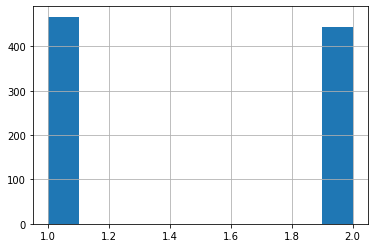

In [320]:
house_vote_ints = house_vote.map({'2. Republican': 2, '1. Democrat': 1})
house_vote_ints.dropna().hist()

## Senate Vote

In [321]:
senate_vote = year["VCF0708"]
senate_vote

42908    2. Republican
42909              NaN
42910              NaN
42911      1. Democrat
42912      1. Democrat
42913      1. Democrat
42914              NaN
42915      1. Democrat
42916      1. Democrat
42917              NaN
42918    2. Republican
42919              NaN
42920              NaN
42921      1. Democrat
42922      1. Democrat
42923              NaN
42924              NaN
42925              NaN
42926              NaN
42927              NaN
42928              NaN
42929              NaN
42930      1. Democrat
42931      1. Democrat
42932              NaN
42933              NaN
42934              NaN
42935    2. Republican
42936      1. Democrat
42937    2. Republican
             ...      
44685      1. Democrat
44686      1. Democrat
44687      1. Democrat
44688    2. Republican
44689              NaN
44690              NaN
44691              NaN
44692      1. Democrat
44693              NaN
44694              NaN
44695              NaN
44696      1. Democrat
44697    2.

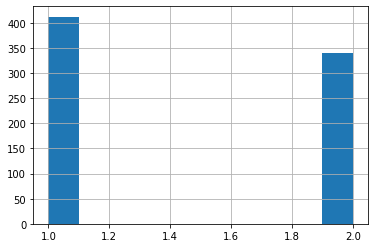

In [322]:
senate_vote_ints = senate_vote.map({'2. Republican': 2, '1. Democrat': 1})
senate_vote_ints.dropna().hist()

### Ticket-Splitting

In [323]:
split_vote = year["VCF0709"]
split_vote

42908    4. Rep. Pres. - Rep. Congressional
42909                                   NaN
42910                                   NaN
42911    1. Dem. Pres. - Dem. Congressional
42912    3. Rep. Pres. - Dem. Congressional
42913    1. Dem. Pres. - Dem. Congressional
42914                                   NaN
42915    1. Dem. Pres. - Dem. Congressional
42916    1. Dem. Pres. - Dem. Congressional
42917                                   NaN
42918                                   NaN
42919                                   NaN
42920                                   NaN
42921    4. Rep. Pres. - Rep. Congressional
42922    1. Dem. Pres. - Dem. Congressional
42923    4. Rep. Pres. - Rep. Congressional
42924                                   NaN
42925                                   NaN
42926                                   NaN
42927                                   NaN
42928    4. Rep. Pres. - Rep. Congressional
42929                                   NaN
42930    1. Dem. Pres. - Dem. Co

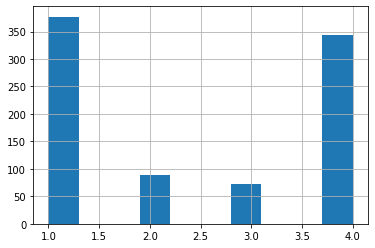

In [324]:
split_vote_ints = split_vote.map({'1. Dem. Pres. - Dem. Congressional': 1, '2. Dem. Pres. - Rep. Congressional': 2, '3. Rep. Pres. - Dem. Congressional' : 3, '4. Rep. Pres. - Rep. Congressional':4})
split_vote_ints.dropna().hist()

# Validate the Dataset
I'll take a look at a couple of specific values for specific years and compare them to the dataset codebook to ensure that the values I have match their documentation. I'll do this for multiple years (one general election and one midterm) to make sure things align across different scenarios. 

## 2000 Value Counts

I'll need to use the [cumulative codebook](https://electionstudies.org/wp-content/uploads/2018/12/anes_timeseries_cdf_codebook_var.pdf) to find the source variables for each of the variables under study, and then I can go to the codebook for the specific year to find the counts and check that they match my dataset.

For the year 2000, I am expecting the following outcomes:

President: Dem : 590, Rep: 530, Did not: 376, Other: 45

Senate: Dem: 412, Rep: 340

House: Dem: 467, Rep: 444

In [325]:
pres_vote.value_counts()

1. Democrat                                                  590
2. Republican                                                530
7. Did not vote or voted but not for president (exc.1972)    376
4. Other (incl. 3d/minor party candidates and write-ins)      45
Name: VCF0706, dtype: int64

In [326]:
senate_vote.value_counts()

1. Democrat      412
2. Republican    340
Name: VCF0708, dtype: int64

In [327]:
house_vote.value_counts()

1. Democrat      467
2. Republican    444
Name: VCF0707, dtype: int64

## Another Year
These match up, but I'll check another year. 
Here is one with no presidential election - 1966. I expect (according to the codebook)

For the year 1962, I am expecting the following outcomes:

President: Empty series, no election.

Senate: Dem: 388, Rep: 289

House: Dem: 155, Rep: 155

In [328]:
year_number = 1966
year_filter = df['VCF0004'] == year_number
year = df[year_filter]
pres_vote = year["VCF0706"]
house_vote = year["VCF0707"]
senate_vote = year["VCF0708"]

pres_vote.value_counts()

Series([], Name: VCF0706, dtype: int64)

In [329]:
house_vote.value_counts()

1. Democrat      388
2. Republican    289
Name: VCF0707, dtype: int64

In [330]:
senate_vote.value_counts()

2. Republican    155
1. Democrat      155
Name: VCF0708, dtype: int64

As these match up, I feel comfortable using this data for analysis.

# Resampling
The last way to prepare the dataset is to account for the startified sampling of the data. Unfortunately, the weights are farily complicated to put in place for this dataset - not every year has weights associated with it, and there are different weight for different modes of administration used at different times. One thing to keep in mind is that the weights change by variable - different types have different weights, and the types vary by individual variable. Luckily, I can mainly stick to "Type 0" variables for my analysis here, and because I don't care about separating out the face to face and online sample (beyond just making sure that they are sampled correctly), I can use one weight variable for my analysis. Here's the [appendeix](https://electionstudies.org/wp-content/uploads/2018/12/anes_timeseries_cdf_codebook_app.pdf) detailing more about how weighting works here. 

To confirm this, I'll resample the dataset and then check out one of the variables I just validated - I should expect to see a small delta in the values.  

In [341]:
n = len(df)
weights = df['VCF0009z']
sample = df.sample(n, 
                     replace=True, 
                     weights=weights)


In [342]:
year_number = 1966
year_filter = sample['VCF0004'] == year_number
year = sample[year_filter]
pres_vote = year["VCF0706"]
house_vote = year["VCF0707"]
senate_vote = year["VCF0708"]

house_vote.value_counts()

1. Democrat      372
2. Republican    285
Name: VCF0707, dtype: int64

In [343]:
senate_vote.value_counts()

1. Democrat      155
2. Republican    146
Name: VCF0708, dtype: int64

As I do see a small change, I feel comfortable moving forward with my analysis as long as I do this resampling step.